<a href="https://colab.research.google.com/github/claudiagiraldo/Proyecto/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Preprocesado de datos: Proyecto Visas**
Por: Claudia Yaneth Giraldo Vergara

C.C. 1001745178

**Aclaración**

Debido al gran tamaño de la base de datos original descargada de Kaggle ('H-1B_Disclosure_Data_FY17.csv') se ha creado una nueva base de datos de menor tamaño ('Visas_reducida') a partir de la base de datos original con 10000 filas seleccionadas de manera aleatoria, esto con el fin de acelerar la carga del archivo a Google Colab.

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt


In [78]:
# Carga de datos 
url = 'https://raw.githubusercontent.com/claudiagiraldo/Proyecto/main/Visas_reducida.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,354115,I-200-17078-371645,CERTIFIED,2017-03-19,2017-03-23,H-1B,2017-09-15,2020-09-14,HSK TECHNOLOGIES INC,NaN,...,N,N,NaN,NaN,NaN,MIAMI,MIAMI-DADE,FL,33131,NaN
1,520870,I-200-17174-799976,CERTIFIED,2017-06-27,2017-07-03,H-1B,2017-06-30,2020-06-29,ACCENTURE LLP,NaN,...,N,N,NaN,NaN,NaN,ATLANTA,FULTON,GA,30308,NaN
2,435723,I-200-17095-547953,CERTIFIED,2017-04-14,2017-04-20,H-1B,2017-08-05,2020-08-04,TATA CONSULTANCY SERVICES LIMITED,NaN,...,Y,N,Y,NaN,NaN,SAN ANTONIO,BEXAR,TX,78288,NaN
3,27054,I-200-16295-236668,CERTIFIED,2016-10-21,2016-10-27,H-1B,2016-11-07,2019-11-06,"URBAN SCIENCE APPLICATIONS, INC.",NaN,...,N,N,NaN,NaN,NaN,DETROIT,WAYNE,MI,48243,NaN
4,87671,I-200-16356-398915,CERTIFIED,2016-12-21,2016-12-28,H-1B,2017-02-03,2020-02-02,"TECH MAHINDRA (AMERICAS),INC.",NaN,...,Y,N,Y,Y,NaN,RICHARDSON,COLLIN,TX,75082,NaN


## **Limpieza de datos**

In [79]:
data = data.drop('VISA_CLASS', axis = 1)
data = data.drop('Unnamed: 0', axis = 1)

nan_porcentajes = (data.isna().sum())*100/len(data)
columnas = nan_porcentajes[nan_porcentajes > 40].index
data = data.drop(columnas, axis=1)

for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        data[col] = data[col].fillna(data[col].median())
    elif pd.api.types.is_string_dtype(data[col]):
        data[col] = data[col].fillna(data[col].mode()[0])


Se escogen las variables que se considera que pueden influir en la variable 'CASE_STATUS', esto también con el fin de hacer el preprocesamiento de datos más fácil.

In [80]:
data = data.loc[:, ['CASE_STATUS', 'EMPLOYER_NAME', 'AGENT_REPRESENTING_EMPLOYER', 'SOC_NAME', 'FULL_TIME_POSITION', 'PW_WAGE_LEVEL', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR']]
data.head()

,CASE_STATUS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SOC_NAME,FULL_TIME_POSITION,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR
0,CERTIFIED,HSK TECHNOLOGIES INC,N,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,Level I,N,N
1,CERTIFIED,ACCENTURE LLP,Y,MANAGEMENT ANALYSTS,Y,Level I,N,N
2,CERTIFIED,TATA CONSULTANCY SERVICES LIMITED,Y,WEB DEVELOPERS,Y,Level III,Y,N
3,CERTIFIED,"URBAN SCIENCE APPLICATIONS, INC.",Y,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,Level III,N,N
4,CERTIFIED,"TECH MAHINDRA (AMERICAS),INC.",N,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,Level II,Y,N


## **Codificación de valores**

Se convierten los valores o etiquetas de forma numérica para que sean legibles para el algoritmo. Las variables 'CASE_STATUS', 'FULL_TIME_POSITION', 'PW_WAGE_LEVEL', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'AGENT_REPRESENTING_EMPLOYER' son fáciles de convertir, mientras que 'SOC_NAME' y 'EMPLOYER_NAME' son más complejas.

*La variable 'CASE_STATUS' se convierte en una variable binaria, se le asignan valores de 1 para indicar que la visa fue aceptada, y 0 para indicar que la visa fue denegada.*

In [81]:
data['CASE_STATUS'] = data['CASE_STATUS'].map({'CERTIFIED' :1, 'CERTIFIED-WITHDRAWN' : 1, 'WITHDRAWN' : 1, 'DENIED' : 0})

In [82]:
data['FULL_TIME_POSITION'] = data['FULL_TIME_POSITION'].map({'N' : 0, 'Y' : 1})
data['PW_WAGE_LEVEL'] = data['PW_WAGE_LEVEL'].map({'Level I' : 1, 'Level II' : 2, 'Level III' : 3, 'Level IV' : 4})
data['H1B_DEPENDENT'] = data['H1B_DEPENDENT'].map({'N' : 0, 'Y' : 1})
data['WILLFUL_VIOLATOR'] = data['WILLFUL_VIOLATOR'].map({'N' : 0, 'Y' : 1})
data['AGENT_REPRESENTING_EMPLOYER'] = data['AGENT_REPRESENTING_EMPLOYER'].map({'N' : 0, 'Y' : 1})


data['SOC_NAME1'] = 'otros'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('COMPUTER','SOFTWARE')] = 'it'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('CHIEF','MANAGMENT')] = 'gerente'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('MECHANICAL')] = 'mecanico'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('DATABASE')] = 'base de datos'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('SALES','MARKET')] = 'scm'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('FINANCIAL')] = 'finanzas'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('PUBLIC','FUNDRAISING')] = 'pr'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('EDUCATION','LAW')] = 'administrativo'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('AUDITORS','COMPLIANCE')] = 'auditoria'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('DISTRIBUTION','LOGISTIC')] = 'logistica'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('RECRUITERS','HUMAN')] = 'rrhh'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('AGRICULTURAL','FARM')] = 'agri'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('CONSTRUCTION','ARCHITECTURAL')] = 'estate'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('FORENCSIC','HEALTH')] = 'propiedades'
data['SOC_NAME1'][data['SOC_NAME'].str.contains('TEACHERS')] = 'educacion'

data['EMPLOYER_NAME1'] = 'otros'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('INFOSYS')] = 'infosys'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('TATA')] = 'tata'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('CAPGEMINI')] = 'capgemini'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('IBM')] = 'ibm'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('MAHINDRA')] = 'mahindra'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('DELOITTE')] = 'deloitte'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('ERNST')] = 'E&Y'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('GOOGLE')] = 'google'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('WIPRO')] = 'wipro'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('HCL')] = 'hcl'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('MICROSOFT')] = 'microsoft'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('AMAZON')] = 'amazon'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('SYNTEL')] = 'syntel'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('COGNIZANT')] = 'cognizant'
data['EMPLOYER_NAME1'][data['EMPLOYER_NAME'].str.contains('APPLE')] = 'apple'
data = data.drop(['EMPLOYER_NAME', 'SOC_NAME'], axis = 1)
data.head()

<ipython-input-82-cabfcd5a19cf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME1'][data['SOC_NAME'].str.contains('COMPUTER','SOFTWARE')] = 'it'
<ipython-input-82-cabfcd5a19cf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME1'][data['SOC_NAME'].str.contains('CHIEF','MANAGMENT')] = 'gerente'
<ipython-input-82-cabfcd5a19cf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SOC_NAME1'][data['SOC_NAME'

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,SOC_NAME1,EMPLOYER_NAME1
0,1,0,1,1,0,0,otros,otros
1,1,1,1,1,0,0,otros,otros
2,1,1,1,3,1,0,otros,tata
3,1,1,1,3,0,0,otros,otros
4,1,0,1,2,1,0,otros,mahindra


Se utiliza la librería sklearn para convertir los datos de 'SOC_NAME' y 'EMPLOYER_NAME' en valores categóricos.

In [83]:
cod_variables = preprocessing.LabelEncoder()
cod_variables.fit(data.SOC_NAME1)
data['SOC_N']=cod_variables.transform(data['SOC_NAME1'])

cod_variables = preprocessing.LabelEncoder()
cod_variables.fit(data.EMPLOYER_NAME1)
data['EMP_N']=cod_variables.transform(data['EMPLOYER_NAME1'])

data = data.drop(['SOC_NAME1', 'EMPLOYER_NAME1'], axis=1)

In [84]:
data.head()

,CASE_STATUS,AGENT_REPRESENTING_EMPLOYER,FULL_TIME_POSITION,PW_WAGE_LEVEL,H1B_DEPENDENT,WILLFUL_VIOLATOR,SOC_N,EMP_N
0,1,0,1,1,0,0,11,12
1,1,1,1,1,0,0,11,12
2,1,1,1,3,1,0,11,14
3,1,1,1,3,0,0,11,12
4,1,0,1,2,1,0,11,10


**Datos desbalanceados**

Se encontró un desbalance de los datos de la variable a predecir ('CASE_STATUS'), como se muestra en el siguiente gráfico

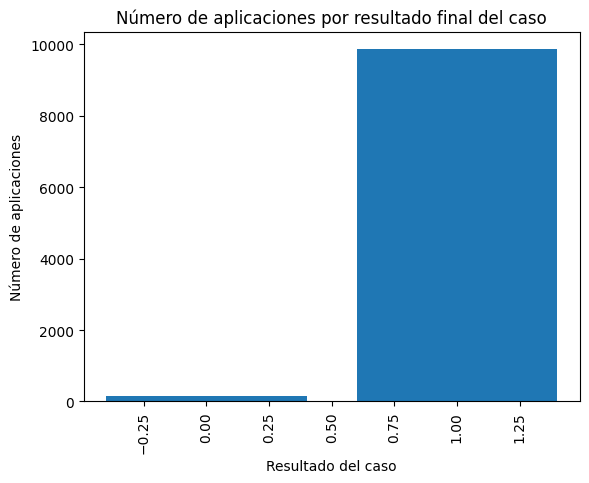

In [85]:
# Gráfico de la variable 'CASE_STATUS'
status_contador = data['CASE_STATUS'].value_counts()
plt.bar(status_contador.index, status_contador.values)
plt.title('Número de aplicaciones por resultado final del caso')
plt.xlabel('Resultado del caso')
plt.ylabel('Número de aplicaciones')
plt.xticks(rotation=90)
plt.show()

Se opta por realizar una reducción de muestreo de la clase mayoritaria

In [86]:
# Separa muestras
aceptadas = data[data['CASE_STATUS'] == 1]
rechazadas = data[data['CASE_STATUS'] == 0]

# Realiza la reducción de muestreo de la clase mayoritaria (aceptadas)
downsampled_certified = resample(aceptadas, 
                                 replace=False,   
                                 n_samples=len(rechazadas),   
                                 random_state=42)  

# Combinar muestras
data = pd.concat([downsampled_certified, rechazadas])

# Dataframe final
data = data.sample(frac=1, random_state=42)

Aunque se pierde una gran cantidad de datos, se obtienen datos balanceados, como se observa en el siguiente gráfico:

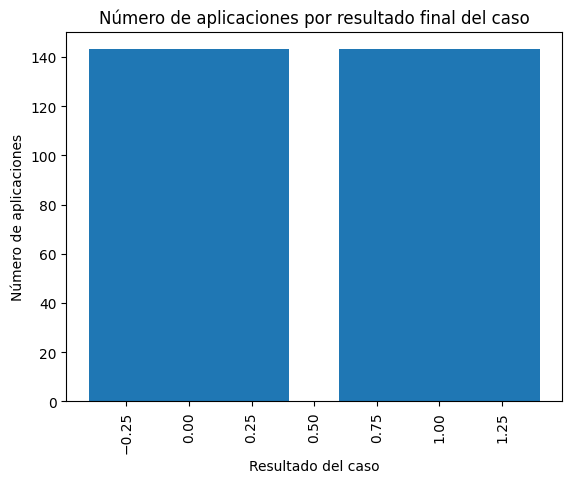

In [87]:
# Gráfico de la variable 'CASE_STATUS'
status_contador = data['CASE_STATUS'].value_counts()
plt.bar(status_contador.index, status_contador.values)
plt.title('Número de aplicaciones por resultado final del caso')
plt.xlabel('Resultado del caso')
plt.ylabel('Número de aplicaciones')
plt.xticks(rotation=90)
plt.show()

Finalmente, con la base de datos lista se procede a seleccionar la variable dependiente y la independiente, y se divide el dataset en 80% para train y 20% para test.

In [88]:
# Variable dependiente e independiente
x = data.drop(['CASE_STATUS'], axis=1) # Variables independientes
y = data['CASE_STATUS'] # Variable dependiente

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

De esta manera, los datos ya estan listos para utilizarlos en los algoritmos